In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df=pd.read_csv("movies_data.csv")

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [4]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.0000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.0000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.0000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.0000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/1966,15,1.5,1966,127642.2792,0.0


In [5]:
df.shape

(10866, 21)

# Description of the Dataset

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [8]:
len(df['id'].unique())

10865

In [9]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
df['tagline']=df['tagline'].fillna('')
df['keywords']=df['keywords'].fillna('')
df['genres']=df['genres'].fillna('')
df['cast']=df['cast'].fillna('')
df['overview']=df['overview'].fillna('')
df['director']=df['director'].fillna('')

In [11]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
homepage                7930
director                   0
tagline                    0
keywords                   0
overview                   0
runtime                    0
genres                     0
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [12]:
df=df.drop(['production_companies','budget_adj','revenue_adj','homepage'],axis=1)
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.5,2015
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,6185,7.1,2015
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/2015,2480,6.3,2015
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,5292,7.5,2015
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/2015,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,6/15/1966,11,7.4,1966
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,12/21/1966,20,5.7,1966
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,1/1/1966,11,6.5,1966
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,11/2/1966,22,5.4,1966


In [13]:
df['cast']=df['cast'].apply(lambda x:str(x).split('|')[0:3])

In [14]:
df['tagline']=df['tagline'].apply(lambda x:str(x).split('|'))
df['tagline']

0                                      [The park is open.]
1                                     [What a Lovely Day.]
2                             [One Choice Can Destroy You]
3                          [Every generation has a story.]
4                                    [Vengeance Hits Home]
                               ...                        
10861                                                   []
10862    [Cinerama sweeps YOU into a drama of speed and...
10863                                                   []
10864                          [WOODY ALLEN STRIKES BACK!]
10865       [It's Shocking! It's Beyond Your Imagination!]
Name: tagline, Length: 10866, dtype: object

In [15]:
df['keywords']=df['keywords'].apply(lambda x:str(x).split('|'))
df['keywords']

0        [monster, dna, tyrannosaurus rex, velociraptor...
1        [future, chase, post-apocalyptic, dystopia, au...
2        [based on novel, revolution, dystopia, sequel,...
3              [android, spaceship, jedi, space opera, 3d]
4                [car race, speed, revenge, suspense, car]
                               ...                        
10861                         [surfer, surfboard, surfing]
10862                        [car race, racing, formula 1]
10863                         [car, trolley, stealing car]
10864                                              [spoof]
10865            [fire, gun, drive, sacrifice, flashlight]
Name: keywords, Length: 10866, dtype: object

In [16]:
df['director']=df['director'].apply(lambda x:str(x).split('|'))
df['director']

0           [Colin Trevorrow]
1             [George Miller]
2          [Robert Schwentke]
3               [J.J. Abrams]
4                 [James Wan]
                 ...         
10861           [Bruce Brown]
10862    [John Frankenheimer]
10863        [Eldar Ryazanov]
10864           [Woody Allen]
10865      [Harold P. Warren]
Name: director, Length: 10866, dtype: object

In [17]:
df['genres']=df['genres'].apply(lambda x:str(x).split('|'))
df['genres']

0        [Action, Adventure, Science Fiction, Thriller]
1        [Action, Adventure, Science Fiction, Thriller]
2                [Adventure, Science Fiction, Thriller]
3         [Action, Adventure, Science Fiction, Fantasy]
4                             [Action, Crime, Thriller]
                              ...                      
10861                                     [Documentary]
10862                        [Action, Adventure, Drama]
10863                                 [Mystery, Comedy]
10864                                  [Action, Comedy]
10865                                          [Horror]
Name: genres, Length: 10866, dtype: object

In [18]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [19]:
df['cast'] = df['cast'].apply(collapse)
df['genres'] = df['genres'].apply(collapse)
df['keywords'] = df['keywords'].apply(collapse)
df['director']=df['director'].apply(collapse)

In [20]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,"[ChrisPratt, BryceDallasHoward, IrrfanKhan]",[ColinTrevorrow],[The park is open.],"[monster, dna, tyrannosaurusrex, velociraptor,...",Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, ScienceFiction, Thriller]",6/9/2015,5562,6.5,2015
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,"[TomHardy, CharlizeTheron, HughKeays-Byrne]",[GeorgeMiller],[What a Lovely Day.],"[future, chase, post-apocalyptic, dystopia, au...",An apocalyptic story set in the furthest reach...,120,"[Action, Adventure, ScienceFiction, Thriller]",5/13/2015,6185,7.1,2015
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,"[ShaileneWoodley, TheoJames, KateWinslet]",[RobertSchwentke],[One Choice Can Destroy You],"[basedonnovel, revolution, dystopia, sequel, d...",Beatrice Prior must confront her inner demons ...,119,"[Adventure, ScienceFiction, Thriller]",3/18/2015,2480,6.3,2015
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[HarrisonFord, MarkHamill, CarrieFisher]",[J.J.Abrams],[Every generation has a story.],"[android, spaceship, jedi, spaceopera, 3d]",Thirty years after defeating the Galactic Empi...,136,"[Action, Adventure, ScienceFiction, Fantasy]",12/15/2015,5292,7.5,2015
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,"[VinDiesel, PaulWalker, JasonStatham]",[JamesWan],[Vengeance Hits Home],"[carrace, speed, revenge, suspense, car]",Deckard Shaw seeks revenge against Dominic Tor...,137,"[Action, Crime, Thriller]",4/1/2015,2947,7.3,2015


In [21]:
df['overview'] = df['overview'].apply(lambda x:x.split())

In [22]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,"[ChrisPratt, BryceDallasHoward, IrrfanKhan]",[ColinTrevorrow],[The park is open.],"[monster, dna, tyrannosaurusrex, velociraptor,...","[Twenty-two, years, after, the, events, of, Ju...",124,"[Action, Adventure, ScienceFiction, Thriller]",6/9/2015,5562,6.5,2015
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,"[TomHardy, CharlizeTheron, HughKeays-Byrne]",[GeorgeMiller],[What a Lovely Day.],"[future, chase, post-apocalyptic, dystopia, au...","[An, apocalyptic, story, set, in, the, furthes...",120,"[Action, Adventure, ScienceFiction, Thriller]",5/13/2015,6185,7.1,2015
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,"[ShaileneWoodley, TheoJames, KateWinslet]",[RobertSchwentke],[One Choice Can Destroy You],"[basedonnovel, revolution, dystopia, sequel, d...","[Beatrice, Prior, must, confront, her, inner, ...",119,"[Adventure, ScienceFiction, Thriller]",3/18/2015,2480,6.3,2015


In [23]:
feature=df['tagline']+df['keywords']+df['genres']+df['director']+df['cast']+df['overview']

In [24]:
feature=feature.apply(lambda x: " ".join(x))

In [25]:
feature

0        The park is open. monster dna tyrannosaurusrex...
1        What a Lovely Day. future chase post-apocalypt...
2        One Choice Can Destroy You basedonnovel revolu...
3        Every generation has a story. android spaceshi...
4        Vengeance Hits Home carrace speed revenge susp...
                               ...                        
10861     surfer surfboard surfing Documentary BruceBro...
10862    Cinerama sweeps YOU into a drama of speed and ...
10863     car trolley stealingcar Mystery Comedy EldarR...
10864    WOODY ALLEN STRIKES BACK! spoof Action Comedy ...
10865    It's Shocking! It's Beyond Your Imagination! f...
Length: 10866, dtype: object

In [26]:
df.isnull().sum()

id                 0
imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
cast               0
director           0
tagline            0
keywords           0
overview           0
runtime            0
genres             0
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [27]:
df[df['imdb_id'].isna()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,release_date,vote_count,vote_average,release_year
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,"[TuppenceMiddleton, BaeDoona, BrianJ.Smith]",[],[],"[sexuality, superhuman, superpower, makingof, ...",[],25,"[Documentary, ScienceFiction]",8/10/2015,12,7.5,2015
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,"[FreddiePrinzeJr., VanessaMarshall, SteveBlum]","[StewardLee, StevenG.Lee]",[],[],"[A, Long, Time, Ago, In, A, Galaxy, Far,, Far,...",44,[],10/3/2014,13,6.8,2014
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,"[FredTatasciore, BryceJohnson, SteveBlum]",[FrankPaur],[],"[marvelcomic, superhero, wolverine, hulk, nors...","[Department, H, sends, in, Wolverine, to, trac...",38,"[Animation, Action, ScienceFiction]",1/27/2009,38,6.9,2009
1750,101907,NaN,0.256975,0,0,Hulk vs. Thor,"[GrahamMcTavish, FredTatasciore, MatthewWolf]",[SamLiu],[A Battle Between God and Monster],"[marvelcomic, superhero, hulk, norsemythology,...","[For, ages,, Odin, has, protected, his, kingdo...",41,"[Action, Animation, Fantasy, ScienceFiction]",1/27/2009,38,6.4,2009
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"[MikaelÃ…kerfeldt, Martin""Axe""Axenrot, MartinM...",[],"[The Loyal Disharmonic Orchestra, Conducted By...",[],"[As, part, of, the, ongoing, celebration, of, ...",163,[Music],9/21/2010,10,8.6,2010
4797,369145,NaN,0.167501,0,0,Doctor Who: The Snowmen,"[MattSmith, JennaColeman, RichardE.Grant]",[],[],[],"[Christmas, Eve,, 1892,, and, the, falling, sn...",60,[],12/25/2012,10,7.8,2012
4872,269177,NaN,0.090552,0,0,Party Bercy,[FlorenceForesti],[],[],[],"[Florence, Foresti, is, offered, Bercy, tribut...",120,[Comedy],9/23/2012,15,6.4,2012
6071,279954,NaN,0.004323,500,0,Portal: Survive!,"[MoniqueBlanchard, BradleyMixon]","[ConnorMcGuire, ColinMcGuire]",[The Cake is a Lie],"[portal, aperture]","[A, short,, live, action, fan, film, by, Colli...",7,"[Action, ScienceFiction]",10/8/2013,11,7.5,2013
7527,50127,NaN,0.570337,0,0,Fallen: The Journey,"[PaulWesley, FernandaAndrade, TomSkerritt]",[MikaelSalomon],[],[],"[A, year, later,, Aaron, is, still, traveling,...",80,"[Action, Adventure, Drama, Fantasy, Family]",1/1/2007,11,7.3,2007
7809,50128,NaN,0.060795,0,0,Fallen: The Destiny,"[PaulWesley, FernandaAndrade, TomSkerritt]",[MikaelSalomon],[],[],"[Aaron, and, Azazel, defeat, the, Powers,, and...",80,"[Adventure, Fantasy, Drama, Action, ScienceFic...",1/1/2007,13,7.0,2007


In [28]:
df['imdb_id'][548]='tt6963278'
df['imdb_id'][997]='tt2930604'
df['imdb_id'][1528]='tt3152670'
df['imdb_id'][1750]='tt1325753'
df['imdb_id'][2401]='tt9256340'
df['imdb_id'][4797]='tt2380513'
df['imdb_id'][4872]='tt2784598'
df['imdb_id'][6071]='tt9755546'
df['imdb_id'][7527]='tt8936254'
df['imdb_id'][7809]='tt0775362'

<ipython-input-28-d86693be1abe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['imdb_id'][548]='tt6963278'
<ipython-input-28-d86693be1abe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['imdb_id'][997]='tt2930604'
<ipython-input-28-d86693be1abe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['imdb_id'][1528]='tt3152670'
<ipython-input-28-d86693be1abe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [29]:
df.isnull().sum()

id                0
imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
tagline           0
keywords          0
overview          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [87]:
df['release_year']

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
10861    1966
10862    1966
10863    1966
10864    1966
10865    1966
Name: release_year, Length: 10866, dtype: int64

In [30]:
df=df.assign(link= lambda x:'https://www.imdb.com/title/'+df['imdb_id']+ '/')

In [31]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'tagline', 'keywords', 'overview', 'runtime',
       'genres', 'release_date', 'vote_count', 'vote_average', 'release_year',
       'link'],
      dtype='object')

In [32]:
#rating for a film 
#(Weighted Rating (WR) =  (v.R/(v+m)+(m.C(v+m))
"""
v is the number of votes for the movie
m is the minimum votes required to be listed in the chart
R is the average rating of the movie
C is the mean vote across the whole report
"""
C=df['vote_average'].mean()
m=df['vote_count'].quantile(0.95)
print(C,m)

5.9749217743419845 1025.75


In [33]:
def rating_finder(df):
    R=df['vote_average']
    v=df['vote_count']
    return ((v*R)/(v+m)+m*C/(m+v))
    

In [34]:
df['wr']=df.apply(rating_finder,axis=1)

In [35]:
df['wr']

0        6.418242
1        6.939954
2        6.204885
3        7.252388
4        6.957869
           ...   
10861    5.990042
10862    5.969664
10863    5.980493
10864    5.962850
10865    5.910426
Name: wr, Length: 10866, dtype: float64

In [36]:
%matplotlib inline

# Change floats from displaying in scientific notation
pd.options.display.float_format = '{:20,.2f}'.format

# Correlation b/w the columns
A correlation matrix is a matrix that shows the correlation values of the variables in the dataset.
which value is increasing with respect to which other value.

In [37]:
corr=df.corr()
corr

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,wr
id,1.00,-0.01,-0.14,-0.10,-0.09,-0.04,-0.06,0.51,-0.04
popularity,-0.01,1.00,0.55,0.66,0.14,0.80,0.21,0.09,0.60
budget,-0.14,0.55,1.00,0.73,0.19,0.63,0.08,0.12,0.28
revenue,-0.10,0.66,0.73,1.00,0.16,0.79,0.17,0.06,0.49
runtime,-0.09,0.14,0.19,0.16,1.00,0.16,0.16,-0.12,0.17
vote_count,-0.04,0.80,0.63,0.79,0.16,1.00,0.25,0.11,0.73
vote_average,-0.06,0.21,0.08,0.17,0.16,0.25,1.00,-0.12,0.51
release_year,0.51,0.09,0.12,0.06,-0.12,0.11,-0.12,1.00,-0.02
wr,-0.04,0.60,0.28,0.49,0.17,0.73,0.51,-0.02,1.00


# Heatmap
A picture speaks a thousand times more than words.
The dark color shows the high correlation between the values and the light colors shows less correlation between the variables.

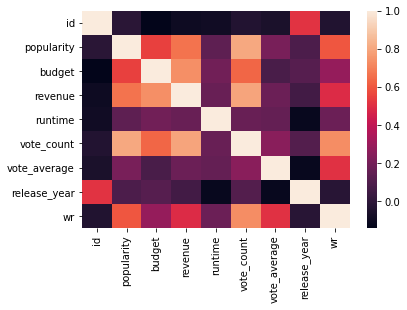

In [38]:
sns.heatmap(df.corr())

plt.savefig("Correlation_HeatMap.jpg")

# Pair Plot

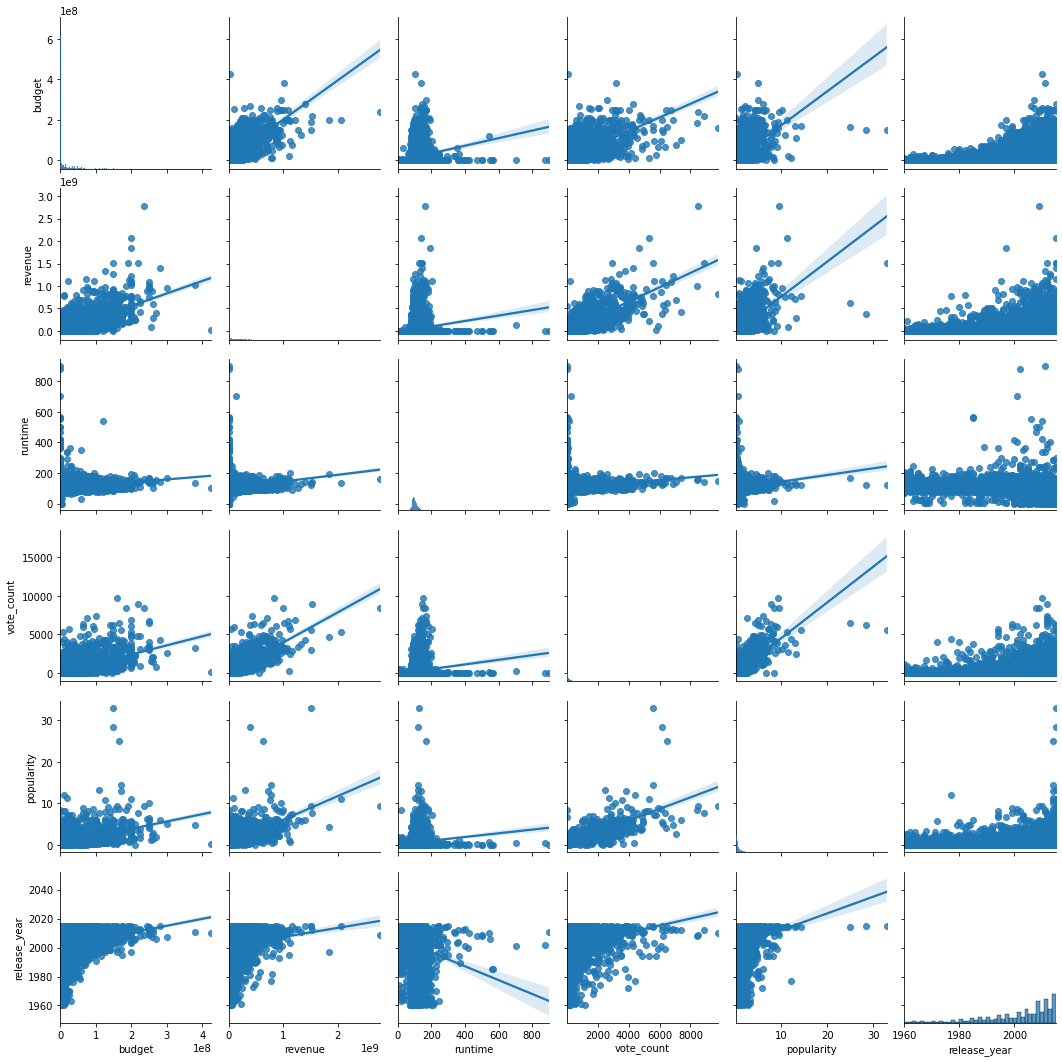

In [39]:
corr_pairplot = df[['budget','revenue','runtime', 'vote_count','popularity','release_year']]
sns.pairplot(corr_pairplot,kind='reg')

# REVENUE
revenue and budget are the real budget and revenue so will perform EDA on budget and revenue, and not on adjusted one.

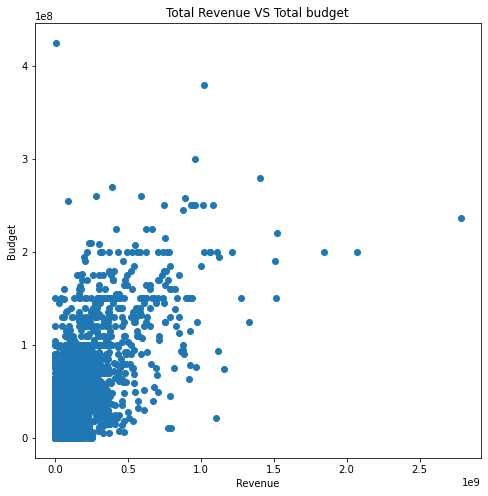

In [40]:
plt.figure(figsize=(8, 8))
plt.scatter(df['revenue'], df['budget'])
plt.title('Total Revenue VS Total budget')
plt.xlabel('Revenue')
plt.ylabel('Budget')
plt.show()

#most films has budget less than 1x10^8 and revenue 5x10^8

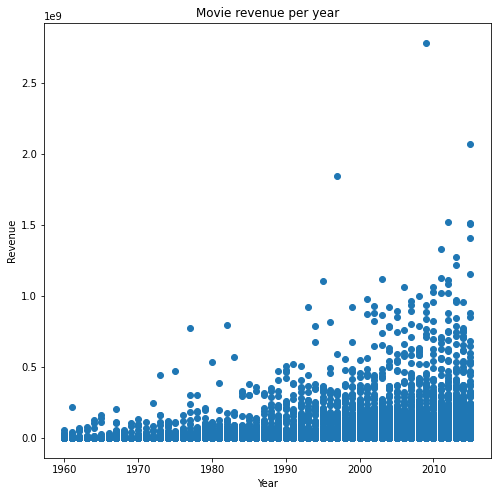

In [41]:
#Movie revenue per year
plt.figure(figsize=(8, 8))
plt.scatter(df['release_year'], df['revenue'])
plt.title('Movie revenue per year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()

# Finding Profit 

In [42]:
df['profit'] = df['revenue']-df['budget']
df['profit'] = df['profit'].apply(np.int64)

In [43]:
def min_max(col_name):
    #using idxmin()  and idxmax() functions to find min and max value of the given column.
    #idxmin to find the index of lowest in given col_name
    min_idx = df[col_name].idxmin()
    #idxmax to find the index of highest in given col_name
    max_idx = df[col_name].idxmax()
    #select the lowest and hisghest value from given col_name
    low  = df[col_name][min_idx]
    high = df[col_name][max_idx]
    #Print the results
    
    print('Movie which has highest '+col_name+' : ', df['original_title'][max_idx]+' with profit ',high)
    print('Movie which has lowest '+col_name+' : ', df['original_title'][min_idx]+' with profit ',low)


In [138]:
df['original_title']

['The Story of Film: An Odyssey',
 'Taken',
 'Band of Brothers',
 'Shoah',
 'North and South, Book I',
 'Planet Earth',
 'The Pacific',
 'John Adams',
 'Life',
 'Generation Kill',
 'The Pillars of the Earth',
 'The 10th Kingdom',
 'Crystal Lake Memories: The Complete History of Friday the 13th',
 'The Blue Planet',
 'World Without End']

# Top Movies From each column

In [55]:
def top_10(col_name,size=10):
    #find the all times top 10 for a fiven column
    #sort the given column and select the top 10
    df_sorted = pd.DataFrame(df[col_name].sort_values(ascending=False))[:size]
    df_sorted['original_title'] = df['original_title']
    t_list=df_sorted['original_title'].tolist()
    tt_list=[]
    for i in t_list:
        i=df[df['original_title']==i]['imdb_id'].tolist()
        tt_list.append(i[0])

        
    plt.figure(figsize=(12,6))
    #Calculate the avarage
    avg = np.mean(df[col_name])   
    sns.barplot(x=col_name, y='original_title', data=df_sorted, label=col_name)
    plt.axvline(avg, color='k', linestyle='--', label='mean')
    if (col_name == 'profit' or col_name == 'budget' or col_name == 'revenue'):
        plt.xlabel(col_name.capitalize() + ' (U.S Dolar)')
    else:
        plt.xlabel(col_name.capitalize())
    plt.ylabel('',color='white')
    plt.title('Top 15 Movies in: ' + col_name.capitalize())
    plt.legend()
    plt.savefig('top_15_'+col_name+'.png',bbox_inches='tight')
    return t_list,tt_list

In [86]:
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,release_date,vote_count,vote_average,release_year,link,wr,profit
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,"[ChrisPratt, BryceDallasHoward, IrrfanKhan]",[ColinTrevorrow],[The park is open.],"[monster, dna, tyrannosaurusrex, velociraptor,...","[Twenty-two, years, after, the, events, of, Ju...",124,"[Action, Adventure, ScienceFiction, Thriller]",6/9/2015,5562,6.50,2015,https://www.imdb.com/title/tt0369610/,6.42,1363528810
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,"[TomHardy, CharlizeTheron, HughKeays-Byrne]",[GeorgeMiller],[What a Lovely Day.],"[future, chase, post-apocalyptic, dystopia, au...","[An, apocalyptic, story, set, in, the, furthes...",120,"[Action, Adventure, ScienceFiction, Thriller]",5/13/2015,6185,7.10,2015,https://www.imdb.com/title/tt1392190/,6.94,228436354
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,"[ShaileneWoodley, TheoJames, KateWinslet]",[RobertSchwentke],[One Choice Can Destroy You],"[basedonnovel, revolution, dystopia, sequel, d...","[Beatrice, Prior, must, confront, her, inner, ...",119,"[Adventure, ScienceFiction, Thriller]",3/18/2015,2480,6.30,2015,https://www.imdb.com/title/tt2908446/,6.20,185238201
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,"[HarrisonFord, MarkHamill, CarrieFisher]",[J.J.Abrams],[Every generation has a story.],"[android, spaceship, jedi, spaceopera, 3d]","[Thirty, years, after, defeating, the, Galacti...",136,"[Action, Adventure, ScienceFiction, Fantasy]",12/15/2015,5292,7.50,2015,https://www.imdb.com/title/tt2488496/,7.25,1868178225
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,"[VinDiesel, PaulWalker, JasonStatham]",[JamesWan],[Vengeance Hits Home],"[carrace, speed, revenge, suspense, car]","[Deckard, Shaw, seeks, revenge, against, Domin...",137,"[Action, Crime, Thriller]",4/1/2015,2947,7.30,2015,https://www.imdb.com/title/tt2820852/,6.96,1316249360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.08,0,0,The Endless Summer,"[MichaelHynson, RobertAugust, Lord'TallyHo'Ble...",[BruceBrown],[],"[surfer, surfboard, surfing]","[The, Endless, Summer,, by, Bruce, Brown,, is,...",95,[Documentary],6/15/1966,11,7.40,1966,https://www.imdb.com/title/tt0060371/,5.99,0
10862,20379,tt0060472,0.07,0,0,Grand Prix,"[JamesGarner, EvaMarieSaint, YvesMontand]",[JohnFrankenheimer],[Cinerama sweeps YOU into a drama of speed and...,"[carrace, racing, formula1]","[Grand, Prix, driver, Pete, Aron, is, fired, b...",176,"[Action, Adventure, Drama]",12/21/1966,20,5.70,1966,https://www.imdb.com/title/tt0060472/,5.97,0
10863,39768,tt0060161,0.07,0,0,Beregis Avtomobilya,"[InnokentiySmoktunovskiy, OlegEfremov, GeorgiZ...",[EldarRyazanov],[],"[car, trolley, stealingcar]","[An, insurance, agent, who, moonlights, as, a,...",94,"[Mystery, Comedy]",1/1/1966,11,6.50,1966,https://www.imdb.com/title/tt0060161/,5.98,0
10864,21449,tt0061177,0.06,0,0,"What's Up, Tiger Lily?","[TatsuyaMihashi, AkikoWakabayashi, MieHama]",[WoodyAllen],[WOODY ALLEN STRIKES BACK!],[spoof],"[In, comic, Woody, Allen's, film, debut,, he, ...",80,"[Action, Comedy]",11/2/1966,22,5.40,1966,https://www.imdb.com/title/tt0061177/,5.96,0


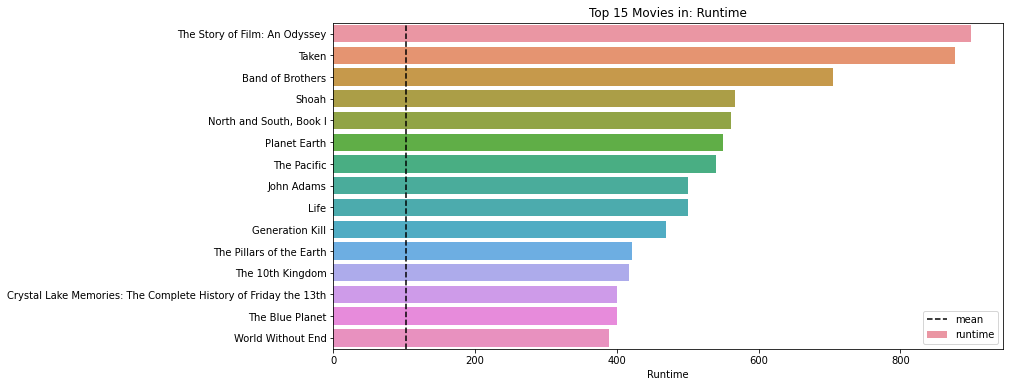

In [136]:
runtime_list,runtime_id_list=top_10('runtime',15)

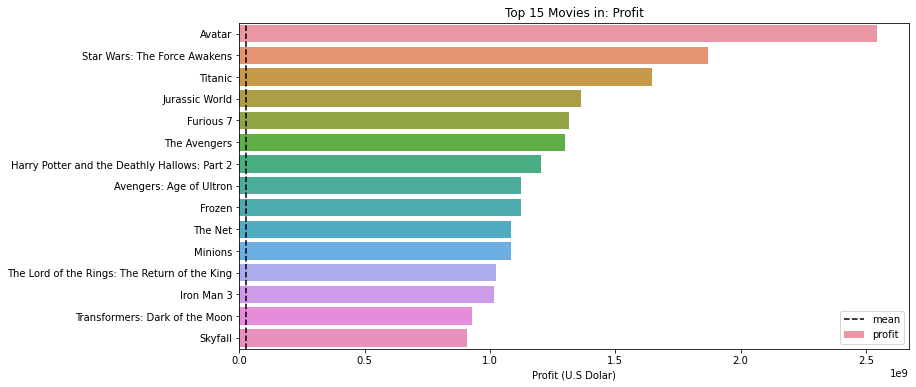

In [56]:
profit_list,profit_id_list=top_10('profit',15)

In [107]:
rate_list

['The Shawshank Redemption',
 'The Dark Knight',
 'The Godfather',
 'Fight Club',
 'Pulp Fiction',
 'Forrest Gump',
 'Interstellar',
 'Inception',
 'The Lord of the Rings: The Return of the King',
 'Guardians of the Galaxy',
 'The Empire Strikes Back',
 'Inside Out',
 'The Matrix',
 'The Imitation Game',
 'Star Wars']

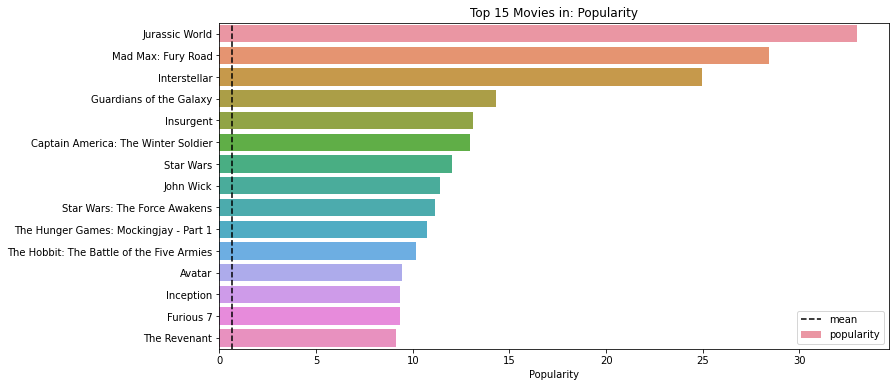

In [57]:
popularity_list,popularity_id_list=top_10('popularity',15)

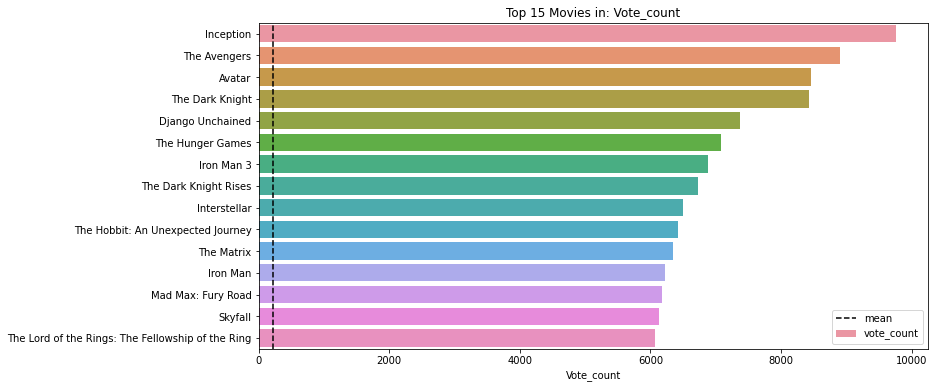

In [58]:
vote_list,vote_id_list=top_10('vote_count',15)

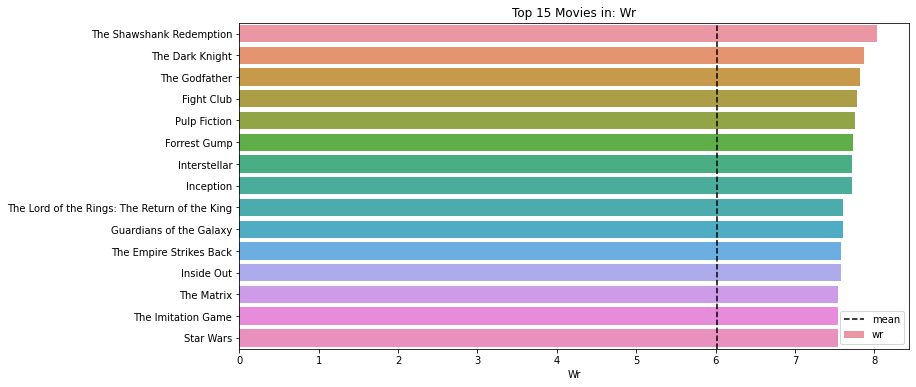

In [59]:
rate_list,rate_id_list=top_10('wr',15)

# Count of Different Genres

In [232]:
def genreVs(col_nam):
    genre=df['genres']
    diff_genre={}
    for i in genre:
        for j in i:
            diff_genre[j]=0
    diff_genre.pop('')
    for i in genre:
        for j in i:
            if(j==''):
                continue
            diff_genre[j]+=1


    labels = diff_genre.keys()
    values=diff_genre.values()

    fig, ax = plt.subplots(figsize=(12,12))
    ax.pie(values, labels = labels, autopct='%.02f%%')
    ax.set_title('Genres Vs Movie count')
    plt.show()

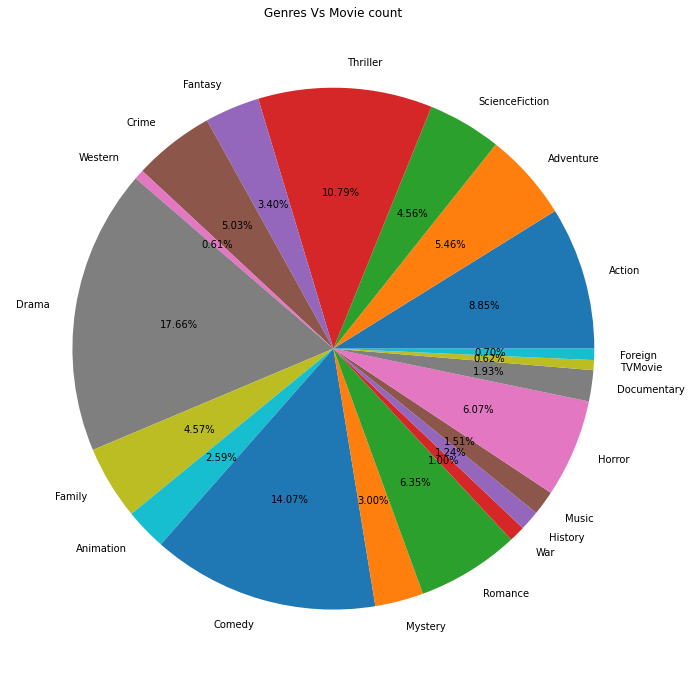

In [233]:
genreVs('profit')

In [151]:
def find_id(l):
    id_list = []
    for i in l:
            id_list.append(df[df['original_title'] == i].imdb_id.tolist()[0])
                
    return id_list

In [152]:
rate_list = ['The Shawshank Redemption',
             'The Dark Knight',
             'The Godfather',
             'Fight Club',
             'Pulp Fiction',
             'Forrest Gump',
             'Interstellar',
             'Inception',
             'The Lord of the Rings: The Return of the King',
             'Guardians of the Galaxy',
             'The Empire Strikes Back',
             'Inside Out',
             'The Matrix',
             'The Imitation Game',
             'Star Wars']
l=find_id(rate_list)
l

['tt0111161',
 'tt0468569',
 'tt0068646',
 'tt0137523',
 'tt0110912',
 'tt0109830',
 'tt0816692',
 'tt1375666',
 'tt0167260',
 'tt2015381',
 'tt0080684',
 'tt2096673',
 'tt0133093',
 'tt2084970',
 'tt0076759']

# Popularity Vs Genre

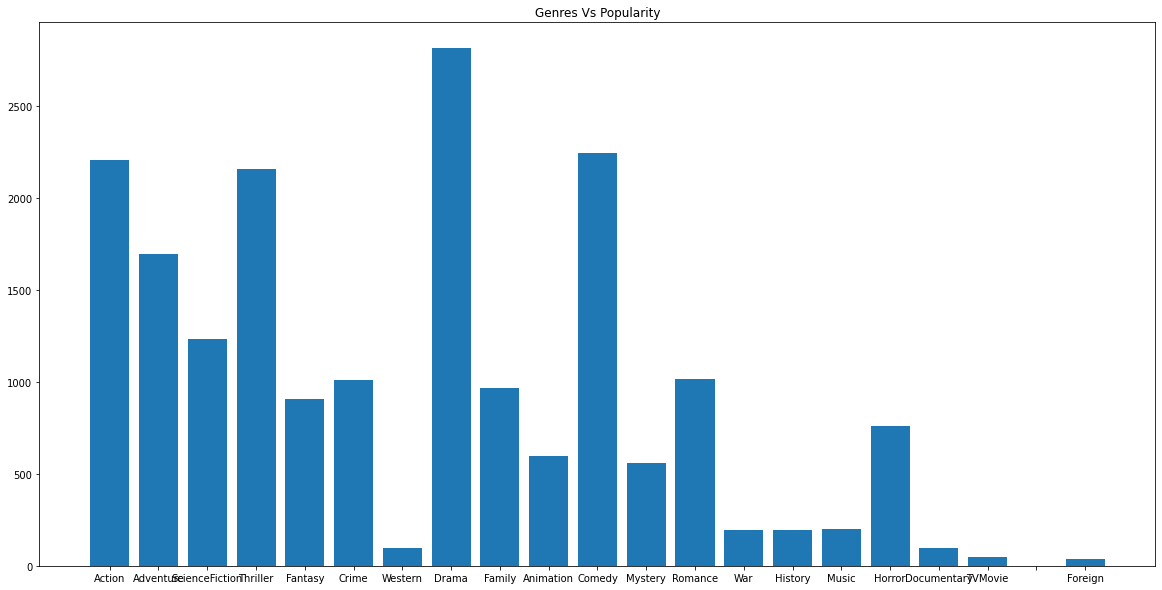

In [236]:
genre=df['genres']
popularity=df['popularity']
diff_genre={}
for i in genre:
    for j in i:
        diff_genre[j]=0

for i in range(len(df)):
    for j in genre[i]:
        if(j==''):
            continue
        diff_genre[j]+=popularity[i]


labels = diff_genre.keys()
values=diff_genre.values()

fig, ax = plt.subplots(figsize=(20,10))
ax.bar(labels,values,width=0.8)
ax.set_title('Genres Vs Popularity')
plt.show()

In [44]:
director={}
for i in df['director']:
    if(i[0] in director.keys()):
        director[i[0]]+=1
    else:
        director[i[0]]=1
director

{'ColinTrevorrow': 2,
 'GeorgeMiller': 9,
 'RobertSchwentke': 5,
 'J.J.Abrams': 5,
 'JamesWan': 8,
 'AlejandroGonzÃ¡lezIÃ±Ã¡rritu': 4,
 'AlanTaylor': 2,
 'RidleyScott': 23,
 'KyleBalda': 5,
 'PeteDocter': 2,
 'SamMendes': 7,
 'LanaWachowski': 3,
 'AlexGarland': 1,
 'ChrisColumbus': 14,
 'JossWhedon': 5,
 'QuentinTarantino': 11,
 'OlivierMegaton': 4,
 'PeytonReed': 6,
 'KennethBranagh': 10,
 'FrancisLawrence': 6,
 'BradBird': 6,
 'AntoineFuqua': 10,
 'BradPeyton': 3,
 'SamTaylor-Johnson': 2,
 'AdamMcKay': 7,
 'ChristopherMcQuarrie': 3,
 'SethMacFarlane': 3,
 'MatthewVaughn': 5,
 'TomMcCarthy': 5,
 'WesBall': 2,
 'BillCondon': 8,
 'NeillBlomkamp': 4,
 'ElizabethBanks': 1,
 'StevenSpielberg': 29,
 'RobLetterman': 3,
 'LennyAbrahamson': 3,
 'AfonsoPoyart': 1,
 'PeterSohn': 2,
 'JaumeCollet-Serra': 6,
 'JohnCrowley': 4,
 'F.GaryGray': 8,
 'BreckEisner': 4,
 'DannyBoyle': 12,
 'GuyRitchie': 8,
 'LeeTolandKrieger': 3,
 'IlyaNaishuller': 1,
 'TimJohnson': 4,
 'JakeSchreier': 2,
 'SimonWest': 8

In [45]:
l=sorted(director.items(),key=lambda x:x[1],reverse=True)
l[:15]

[('WoodyAllen', 46),
 ('', 44),
 ('ClintEastwood', 34),
 ('MartinScorsese', 30),
 ('StevenSpielberg', 29),
 ('RidleyScott', 23),
 ('RonHoward', 22),
 ('StevenSoderbergh', 22),
 ('JoelSchumacher', 21),
 ('TimBurton', 20),
 ('BrianDePalma', 20),
 ('BarryLevinson', 19),
 ('WesCraven', 19),
 ('JohnCarpenter', 19),
 ('RobReiner', 18)]

In [46]:
l.remove(l[1])

In [70]:
names=[l[i][0] for i in range(14,-1,-1)]
wt=[l[i][1] for i in range(14,-1,-1)]


In [75]:
names

['DavidCronenberg',
 'RobReiner',
 'JohnCarpenter',
 'WesCraven',
 'BarryLevinson',
 'BrianDePalma',
 'TimBurton',
 'JoelSchumacher',
 'StevenSoderbergh',
 'RonHoward',
 'RidleyScott',
 'StevenSpielberg',
 'MartinScorsese',
 'ClintEastwood',
 'WoodyAllen']

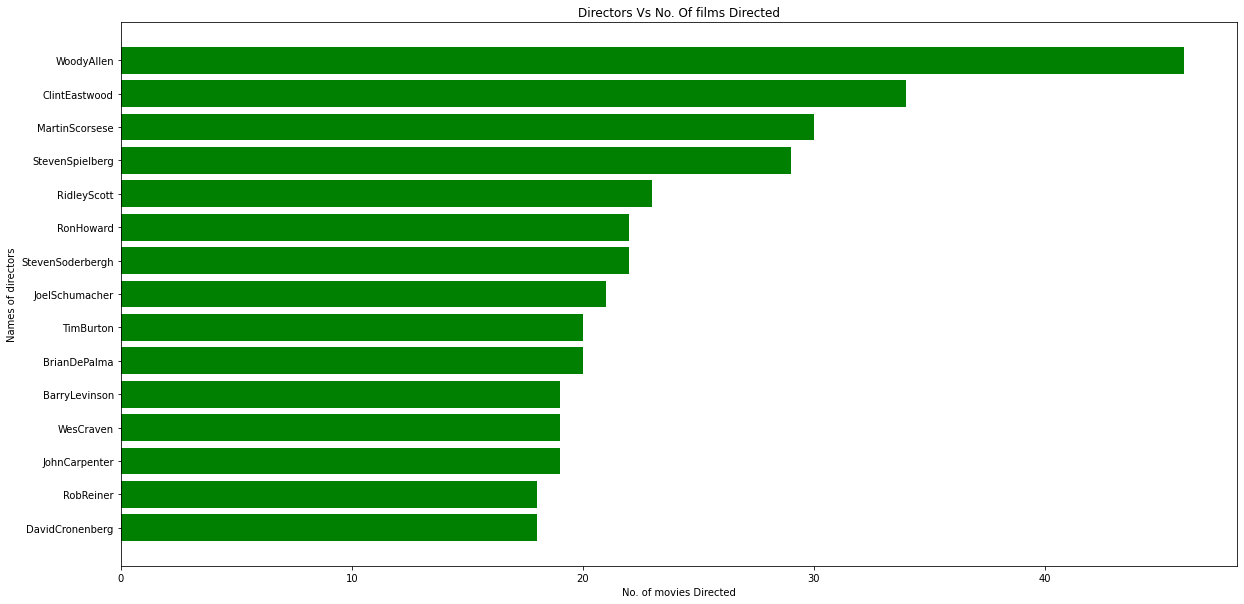

In [74]:

fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.barh(names,wt,color='green')
 
plt.ylabel("Names of directors")
plt.xlabel("No. of movies Directed")
plt.title("Directors Vs No. Of films Directed")
plt.savefig('directors.jpg')
plt.show()

In [96]:
actor={}
for i in df['cast']:
    for j in i:
        if(j in actor.keys()):
            actor[j]+=1
        else:
            actor[j]=1
actor

{'ChrisPratt': 3,
 'BryceDallasHoward': 4,
 'IrrfanKhan': 5,
 'TomHardy': 16,
 'CharlizeTheron': 28,
 'HughKeays-Byrne': 2,
 'ShaileneWoodley': 6,
 'TheoJames': 3,
 'KateWinslet': 29,
 'HarrisonFord': 41,
 'MarkHamill': 14,
 'CarrieFisher': 8,
 'VinDiesel': 19,
 'PaulWalker': 19,
 'JasonStatham': 30,
 'LeonardoDiCaprio': 26,
 'WillPoulter': 5,
 'ArnoldSchwarzenegger': 33,
 'JasonClarke': 4,
 'EmiliaClarke': 2,
 'MattDamon': 36,
 'JessicaChastain': 16,
 'KristenWiig': 17,
 'SandraBullock': 29,
 'JonHamm': 8,
 'MichaelKeaton': 23,
 'AmyPoehler': 8,
 'PhyllisSmith': 2,
 'RichardKind': 3,
 'DanielCraig': 20,
 'ChristophWaltz': 8,
 'LÃ©aSeydoux': 4,
 'MilaKunis': 14,
 'ChanningTatum': 19,
 'SeanBean': 20,
 'DomhnallGleeson': 5,
 'AliciaVikander': 5,
 'OscarIsaac': 9,
 'AdamSandler': 33,
 'MichelleMonaghan': 17,
 'PeterDinklage': 7,
 'RobertDowneyJr.': 35,
 'ChrisHemsworth': 11,
 'MarkRuffalo': 22,
 'SamuelL.Jackson': 54,
 'KurtRussell': 33,
 'JenniferJasonLeigh': 20,
 'LiamNeeson': 39,
 'Fo

In [133]:
a=sorted(actor.items(),key=lambda x:x[1],reverse=True)
a[:15]

[('', 76),
 ('RobertDeNiro', 65),
 ('NicolasCage', 58),
 ('SamuelL.Jackson', 54),
 ('BruceWillis', 54),
 ('JohnnyDepp', 46),
 ('JohnCusack', 46),
 ('TomHanks', 44),
 ('MichaelCaine', 44),
 ('RobinWilliams', 44),
 ('SylvesterStallone', 43),
 ('ClintEastwood', 43),
 ('MorganFreeman', 42),
 ('SusanSarandon', 42),
 ('EddieMurphy', 42)]

In [134]:
a.remove(a[0])
a_name=[a[i][0] for i in range(15,-1,-1)]
a_count=[a[i][1] for i in range(15,-1,-1)]

In [121]:
a_name.reverse()
a_count.reverse()

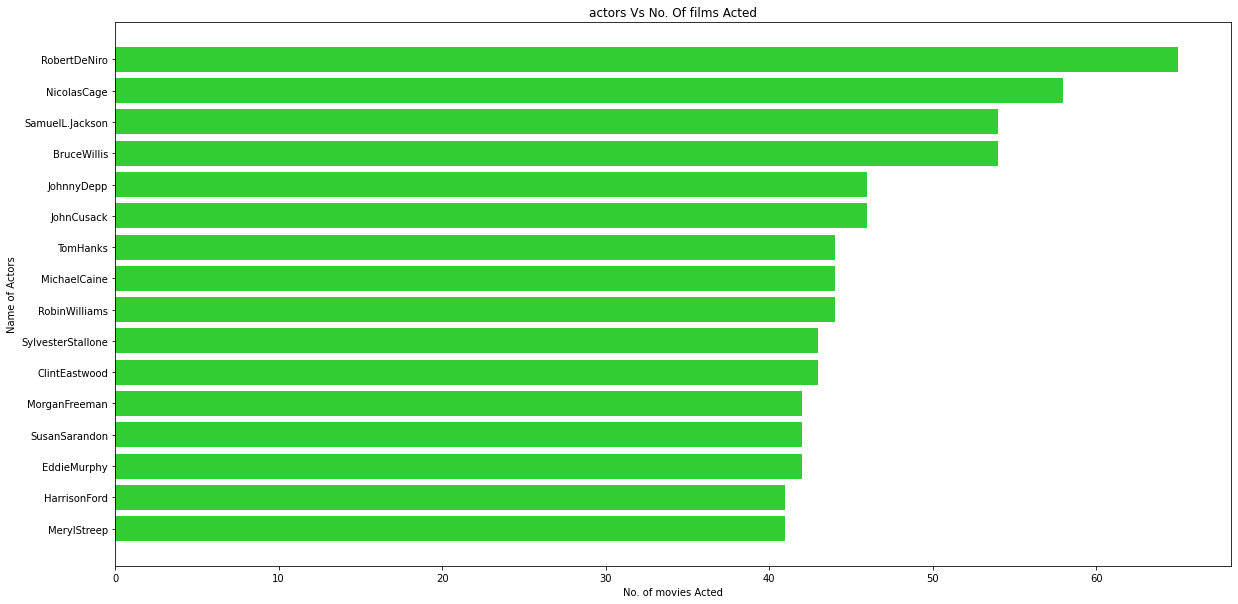

In [135]:

fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.barh(a_name,a_count,color='limegreen')
 
plt.ylabel("Name of Actors")
plt.xlabel("No. of movies Acted")
plt.title("actors Vs No. Of films Acted")
plt.savefig('actors.jpg')
plt.show()

In [89]:
text =(' ').join(df['original_title'])
text=text.split()
unique_word=set(text)
j=0
word_count={}
for word in unique_word:
    word_count[word]=text.count(word)
word=sorted(word_count.items(),key=lambda x:x[1],reverse=True)
word[:15]

[('The', 2314),
 ('the', 964),
 ('of', 959),
 ('and', 307),
 ('in', 253),
 ('A', 234),
 ('to', 205),
 ('2', 156),
 ('&', 153),
 ('a', 151),
 ('Man', 145),
 ('I', 98),
 ('Love', 96),
 ('Dead', 95),
 ('Movie', 91)]

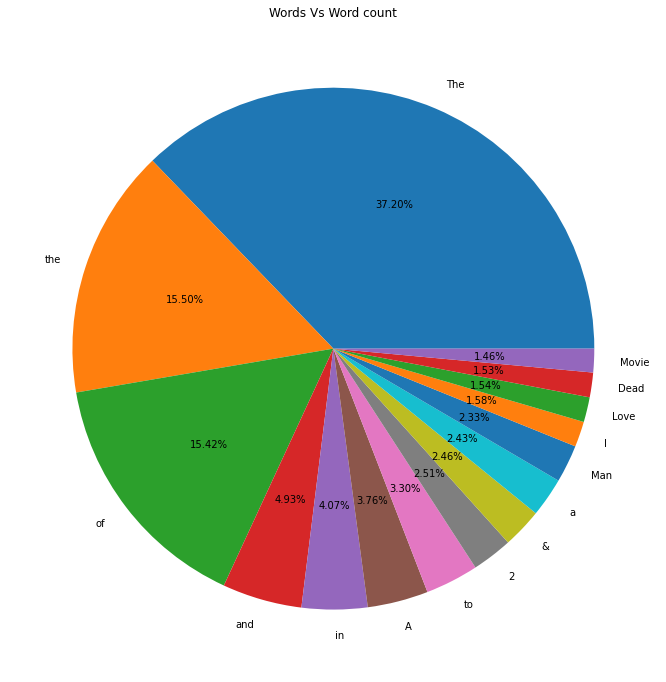

In [92]:
words=[word[i][0] for i in range(15)]
counts=[word[i][1] for i in range(15)]
fig, ax = plt.subplots(figsize=(12,12))
ax.pie(counts, labels = words, autopct='%.02f%%')
ax.set_title('Words Vs Word count')
plt.savefig('wordcount.jpg')
plt.show()


# Building the model for movie Recommendation

In [237]:
feature

0        The park is open. monster dna tyrannosaurusrex...
1        What a Lovely Day. future chase post-apocalypt...
2        One Choice Can Destroy You basedonnovel revolu...
3        Every generation has a story. android spaceshi...
4        Vengeance Hits Home carrace speed revenge susp...
                               ...                        
10861     surfer surfboard surfing Documentary BruceBro...
10862    Cinerama sweeps YOU into a drama of speed and ...
10863     car trolley stealingcar Mystery Comedy EldarR...
10864    WOODY ALLEN STRIKES BACK! spoof Action Comedy ...
10865    It's Shocking! It's Beyond Your Imagination! f...
Length: 10866, dtype: object

In [300]:
title_list=df['original_title'].tolist()
title_list

['Jurassic World',
 'Mad Max: Fury Road',
 'Insurgent',
 'Star Wars: The Force Awakens',
 'Furious 7',
 'The Revenant',
 'Terminator Genisys',
 'The Martian',
 'Minions',
 'Inside Out',
 'Spectre',
 'Jupiter Ascending',
 'Ex Machina',
 'Pixels',
 'Avengers: Age of Ultron',
 'The Hateful Eight',
 'Taken 3',
 'Ant-Man',
 'Cinderella',
 'The Hunger Games: Mockingjay - Part 2',
 'Tomorrowland',
 'Southpaw',
 'San Andreas',
 'Fifty Shades of Grey',
 'The Big Short',
 'Mission: Impossible - Rogue Nation',
 'Ted 2',
 'Kingsman: The Secret Service',
 'Spotlight',
 'Maze Runner: The Scorch Trials',
 'Mr. Holmes',
 'Chappie',
 'Pitch Perfect 2',
 'Bridge of Spies',
 'Goosebumps',
 'Room',
 'Solace',
 'The Good Dinosaur',
 'Run All Night',
 'Brooklyn',
 'Straight Outta Compton',
 'The Last Witch Hunter',
 'Steve Jobs',
 'The Man from U.N.C.L.E.',
 'The Age of Adaline',
 'Hardcore Henry',
 'Home',
 'Paper Towns',
 'Wild Card',
 'The Lobster',
 'Carol',
 'The Intern',
 'Everest',
 'Joy',
 'Point Br

In [119]:
vectorizer=TfidfVectorizer()

In [239]:
vectors=vectorizer.fit_transform(feature)

In [240]:
print(vectors)

  (0, 21245)	0.17984696959011467
  (0, 25995)	0.10340714257729619
  (0, 7421)	0.05164258635779298
  (0, 16385)	0.20425108424280977
  (0, 36476)	0.15900463961479247
  (0, 3530)	0.05230596061790151
  (0, 54207)	0.06877437524326069
  (0, 49634)	0.1632486608687396
  (0, 13917)	0.14905240550220564
  (0, 19078)	0.1854295633631
  (0, 19067)	0.15999207250761782
  (0, 17680)	0.13845821330540029
  (0, 35749)	0.08338756709472749
  (0, 35768)	0.2132579168515504
  (0, 24301)	0.1978606348075959
  (0, 26963)	0.3777076043977106
  (0, 36003)	0.0289508203577932
  (0, 16857)	0.10894460970713778
  (0, 1224)	0.06443801368508635
  (0, 54480)	0.08133468061816478
  (0, 51361)	0.07073746101659183
  (0, 51334)	0.14004557289346503
  (0, 24239)	0.1888538021988553
  (0, 7112)	0.1888538021988553
  (0, 9187)	0.1978606348075959
  :	:
  (10865, 29058)	0.12546298870468606
  (10865, 11693)	0.13997050604906353
  (10865, 13634)	0.14377870025042147
  (10865, 20951)	0.134324609675526
  (10865, 14907)	0.14787988246998401
  (

In [241]:
#Getting similarity Score for every movie and compare this score
#to show which movie is similar to which
similarity_score=cosine_similarity(vectors)
print(similarity_score)

[[1.         0.03881624 0.01534584 ... 0.00856928 0.00998096 0.00537245]
 [0.03881624 1.         0.05873907 ... 0.04183448 0.05400907 0.02268947]
 [0.01534584 0.05873907 1.         ... 0.0046024  0.00222887 0.00224599]
 ...
 [0.00856928 0.04183448 0.0046024  ... 1.         0.01455135 0.0099442 ]
 [0.00998096 0.05400907 0.00222887 ... 0.01455135 1.         0.01917785]
 [0.00537245 0.02268947 0.00224599 ... 0.0099442  0.01917785 1.        ]]


In [242]:
#comapre every movie with every other movie
similarity_score.shape

(10866, 10866)

In [243]:
#similarity score of 1st movie from other movies
similarity_score[0]

array([1.        , 0.03881624, 0.01534584, ..., 0.00856928, 0.00998096,
       0.00537245])

In [297]:
final_df[final_df['original_title']=='Batman Begins'].index[0] # for finding index

6191

In [309]:
lower_title_list={}
for i in range(len(title_list)):
    lower_title_list[title_list[i].lower()]=i
lower_title_list

{'jurassic world': 0,
 'mad max: fury road': 1,
 'insurgent': 2,
 'star wars: the force awakens': 3,
 'furious 7': 4,
 'the revenant': 1707,
 'terminator genisys': 6,
 'the martian': 7,
 'minions': 8,
 'inside out': 9,
 'spectre': 10,
 'jupiter ascending': 11,
 'ex machina': 12,
 'pixels': 13,
 'avengers: age of ultron': 14,
 'the hateful eight': 15,
 'taken 3': 16,
 'ant-man': 17,
 'cinderella': 5403,
 'the hunger games: mockingjay - part 2': 19,
 'tomorrowland': 20,
 'southpaw': 21,
 'san andreas': 22,
 'fifty shades of grey': 23,
 'the big short': 24,
 'mission: impossible - rogue nation': 25,
 'ted 2': 26,
 'kingsman: the secret service': 27,
 'spotlight': 28,
 'maze runner: the scorch trials': 29,
 'mr. holmes': 30,
 'chappie': 31,
 'pitch perfect 2': 32,
 'bridge of spies': 33,
 'goosebumps': 34,
 'room': 35,
 'solace': 36,
 'the good dinosaur': 37,
 'run all night': 38,
 'brooklyn': 39,
 'straight outta compton': 40,
 'the last witch hunter': 41,
 'steve jobs': 42,
 'the man fro

In [313]:
lower_title_list.keys()

dict_keys(['jurassic world', 'mad max: fury road', 'insurgent', 'star wars: the force awakens', 'furious 7', 'the revenant', 'terminator genisys', 'the martian', 'minions', 'inside out', 'spectre', 'jupiter ascending', 'ex machina', 'pixels', 'avengers: age of ultron', 'the hateful eight', 'taken 3', 'ant-man', 'cinderella', 'the hunger games: mockingjay - part 2', 'tomorrowland', 'southpaw', 'san andreas', 'fifty shades of grey', 'the big short', 'mission: impossible - rogue nation', 'ted 2', 'kingsman: the secret service', 'spotlight', 'maze runner: the scorch trials', 'mr. holmes', 'chappie', 'pitch perfect 2', 'bridge of spies', 'goosebumps', 'room', 'solace', 'the good dinosaur', 'run all night', 'brooklyn', 'straight outta compton', 'the last witch hunter', 'steve jobs', 'the man from u.n.c.l.e.', 'the age of adaline', 'hardcore henry', 'home', 'paper towns', 'wild card', 'the lobster', 'carol', 'the intern', 'everest', 'joy', 'point break', 'burnt', 'self/less', 'mortdecai', 'th

In [323]:
from difflib import get_close_matches
def recommend(title):
    #find closest title from title list
    title=title.lower()
    title=get_close_matches(title,list(lower_title_list.keys()))[0]
    
    idx=final_df[final_df['original_title']==title_list[lower_title_list[title]]].index[0]
    idx_score=list(enumerate(similarity_score[idx]))
    req_movies=sorted(idx_score,reverse=True,key=lambda x:x[1]) #sort on basis of 2nd parameter which is similarity score
    cnt=0;
    for i in req_movies:
        print(final_df['original_title'][i[0]])
        cnt+=1
        if(cnt==25):
            break
    
    

In [325]:
recommend('avengers')

The Avengers
Avengers: Age of Ultron
Captain America: The Winter Soldier
Iron Man 2
The Incredible Hulk
Captain America: The First Avenger
TMNT
Kingsman: The Secret Service
Echelon Conspiracy
Brink!
Marvel One-Shot: The Consultant
The Losers
The Day After Tomorrow
Thank You for Smoking
4: Rise of the Silver Surfer
Push
The Shadow
Kung Fury
Spy
It's a Free World...
Phineas and Ferb: Mission Marvel
Iron Man 3
Fail-Safe
Enemy Mine
Iron Man


In [268]:
df.to_csv('final_df.csv')

In [274]:
df.to_pickle('movie_data')

In [275]:
with open('title_list.pkl', 'wb') as file:
    pickle.dump(title_list, file)

<IPython.core.display.Javascript object>

In [276]:
with open('similarity.pkl', 'wb') as file1:
    pickle.dump(similarity_score, file1)

<IPython.core.display.Javascript object>

In [280]:
# import joblib
# with open('similarity2.pkl', 'wb') as file1:
#     joblib.dump(similarity_score, file1)